In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # show all columns
import matplotlib.pyplot as plt
import seaborn as sns

import helperFunctions

from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [3]:
# read the train and test csv files
train_df = pd.read_csv('imputed_data/train.csv')
test_df = pd.read_csv('imputed_data/test-3.csv')

In [4]:
train_df

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
0,3,12,0,14,4,0,Stuttgart,2009-08-07,H,6,12,0,13,7,0,0,0,Wolfsburg,bundesliga
1,1,10,0,7,0,1,FC Koln,2009-08-08,H,16,8,0,24,11,0,0,0,Dortmund,bundesliga
2,3,20,0,15,3,2,Hannover,2009-08-08,H,5,16,0,10,4,0,0,3,Hertha,bundesliga
3,10,28,0,9,3,2,Bayern Munich,2009-08-08,D,3,10,0,9,1,1,1,0,Hoffenheim,bundesliga
4,5,28,0,13,7,2,Leverkusen,2009-08-08,D,3,22,0,8,4,2,1,1,Mainz,bundesliga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,7,1,0,17,4,1,Udinese,2017-05-28,H,6,15,0,17,6,0,3,2,Inter,serie-a
12778,7,16,0,17,4,4,Empoli,2017-05-28,H,0,18,0,10,5,0,0,3,Palermo,serie-a
12779,2,14,0,13,4,0,Genoa,2017-05-28,H,6,8,0,24,7,1,1,2,Roma,serie-a
12780,10,8,0,22,7,0,Napoli,2017-05-28,A,5,9,0,12,2,2,0,1,Sampdoria,serie-a


In [5]:
test_df

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
0,5,17,0,19,4,2,Leverkusen,2017-08-18,4,13,0,13,8,0,2,1,Bayern Munich,bundesliga
1,7,16,0,13,1,3,Augsburg,2017-08-19,3,18,0,11,5,0,1,4,Hamburg,bundesliga
2,1,12,0,9,2,1,Stuttgart,2017-08-19,5,18,0,10,3,0,0,2,Hertha,bundesliga
3,4,15,0,11,2,3,Werder Bremen,2017-08-19,6,17,0,14,3,0,0,1,Hoffenheim,bundesliga
4,1,14,0,6,2,5,Hannover,2017-08-19,13,18,0,14,6,0,0,3,Mainz,bundesliga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1,5,1,9,3,1,Fiorentina,2018-05-20,6,10,0,18,11,1,2,2,Milan,serie-a
1822,9,9,0,9,4,0,Crotone,2018-05-20,6,3,0,19,9,0,2,0,Napoli,serie-a
1823,9,8,0,15,6,1,Roma,2018-05-20,5,14,0,16,3,1,0,1,Sassuolo,serie-a
1824,3,11,0,9,3,4,Sampdoria,2018-05-20,5,10,0,16,6,0,1,1,Spal,serie-a


In [6]:
print(f"Number of null values in train_df = {train_df.isnull().sum().sum()}")
print(f"Number of null values in test_df = {test_df.isnull().sum().sum()}")

Number of null values in train_df = 0
Number of null values in test_df = 0


In [7]:
train_df.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'Date', 'FTR', 'HC',
       'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HY', 'HomeTeam', 'league'],
      dtype='object')

In [8]:
test_df.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'Date', 'HC', 'HF',
       'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HY', 'HomeTeam', 'league'],
      dtype='object')

Therefore, there are no null values in both `train_df` and `test_df`.

Now, we can add more columns to the train and test dataframes like (using the CSVs in downloaded_data):

- **win/draw odds of HomeTeam/AwayTeam** because betting odds capture what people are thinking -- can be really good predictor of the winning team,  
- **number of wins, draws, losses in the last five matches** can tried to capture the form the team is in going into the match, 
- **number of days since last match** can tried to capture team's fatigue going into the match, 
- **number of times the HomeTeam/AwayTeam hit the woodwork** because the team hitting the woodwork is attacking well and has a good chance at scoring a goal the next time they try. However, this is not necessary. --- *NOT AVAILABLE*  
- **number of freekicks conceded by the HomeTeam/AwayTeam ** because the team conceding a lot of freekicks is not good at defending. Could signal a weak team. But, some strong teams too play aggressively. Again, this is not necessary.  --- *NOT AVAILABLE*  
- **number of offsides for HomeTeam/AwayTeam.** But we won't since interpreted in two ways. Either the defending team has a great offside trap mechanism or the attacking team is able to find space to counter-attack but failed. --- *NOT AVAILABLE*  

from the downloaded_data. 

Extract match's Bet365 odds in train and test datasets and add those columns

In [9]:
? helperFunctions.extractMatchOdds

Signature:  helperFunctions.extractMatchOdds(row)
Docstring:
Extract Bet365 matchOdds information after searching for the match. 
We use Bet365 because that is the one available for all matches across leagues.
File:      /code/football-ftr-prediction/helperFunctions.py
Type:      function


In [10]:
train_df['B365H'], train_df['B365D'], train_df['B365A'] = zip(*train_df.progress_apply(helperFunctions.extractMatchOdds, axis=1))
test_df['B365H'], test_df['B365D'], test_df['B365A'] = zip(*test_df.progress_apply(helperFunctions.extractMatchOdds, axis=1))

100%|██████████| 1826/1826 [00:27<00:00, 65.94it/s]


Next, we can also count the number of wins, odds, losses in the last five matches and add those columns.

In [11]:
? helperFunctions.numWDLInLastFiveMatches

Signature:  helperFunctions.numWDLInLastFiveMatches(row)
Docstring: Look back the last five matches for both homeTeam and awayTeam and count number of wins, losses and draws.
File:      /code/football-ftr-prediction/helperFunctions.py
Type:      function


In [12]:
train_df['HPr5MW'], train_df['HPr5MD'], train_df['HPr5ML'], train_df['APr5MW'], train_df['APr5MD'], train_df['APr5ML'] = \
        zip(*train_df.progress_apply(helperFunctions.numWDLInLastFiveMatches, axis=1))

100%|██████████| 12782/12782 [07:16<00:00, 29.32it/s]


In [13]:
test_df['HPr5MW'], test_df['HPr5MD'], test_df['HPr5ML'], test_df['APr5MW'], test_df['APr5MD'], test_df['APr5ML'] = \
        zip(*test_df.progress_apply(helperFunctions.numWDLInLastFiveMatches, axis=1))

100%|██████████| 1826/1826 [00:57<00:00, 31.68it/s]


Finally, we can count the number of days since the last match for both home and away teams.

In [14]:
? helperFunctions.numDaysSinceLastMatch

Signature:  helperFunctions.numDaysSinceLastMatch(row)
Docstring: Get the number of days since the homeTeam played a match. Similarly, get it for the awayTeam.
File:      /code/football-ftr-prediction/helperFunctions.py
Type:      function


In [15]:
train_df["HPrM"], train_df["APrM"] = zip(*train_df.progress_apply(helperFunctions.numDaysSinceLastMatch, axis=1))
test_df["HPrM"], test_df["APrM"] = zip(*test_df.progress_apply(helperFunctions.numDaysSinceLastMatch, axis=1))

100%|██████████| 1826/1826 [00:56<00:00, 32.25it/s]


Let's examine the recently added columns for `train_df` and `test_df`.

In [16]:
newestColumns = [   "Date", "HomeTeam", "AwayTeam", # identify match
                    "B365H", "B365D", "B365A", # Bet365 odds for homeTeam win, draw, awayTeam win
                    "HPr5MW", "HPr5MD","HPr5ML", # number of wins/draws/losses in the last 5 matches for the homeTeam 
                    "APr5MW","APr5MD", "APr5ML", # number of wins/draws/losses in the last 5 matches for the awayTeam 
                    "HPrM", "APrM"] # numDays since previous match for home and away teams

In [17]:
train_df[newestColumns]

,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,HPr5MW,HPr5MD,HPr5ML,APr5MW,APr5MD,APr5ML,HPrM,APrM
0,2009-08-07,Wolfsburg,Stuttgart,1.95,3.50,3.75,0,0,0,0,0,0,18,18
1,2009-08-08,Dortmund,FC Koln,1.62,3.75,5.50,0,0,0,0,0,0,18,18
2,2009-08-08,Hertha,Hannover,1.80,3.50,4.50,0,0,0,0,0,0,18,18
3,2009-08-08,Hoffenheim,Bayern Munich,4.20,3.40,1.91,0,0,0,0,0,0,18,18
4,2009-08-08,Mainz,Leverkusen,3.80,3.40,2.00,0,0,0,0,0,0,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,2017-05-28,Inter,Udinese,1.33,5.50,8.50,1,0,4,1,2,2,7,7
12778,2017-05-28,Palermo,Empoli,6.00,4.33,1.53,2,1,2,2,0,3,6,7
12779,2017-05-28,Roma,Genoa,1.06,15.00,34.00,4,0,1,2,0,3,8,7
12780,2017-05-28,Sampdoria,Napoli,15.00,7.50,1.18,0,3,2,4,1,0,7,8


In [18]:
test_df[newestColumns]

,Date,HomeTeam,AwayTeam,B365H,B365D,B365A,HPr5MW,HPr5MD,HPr5ML,APr5MW,APr5MD,APr5ML,HPrM,APrM
0,2017-08-18,Bayern Munich,Leverkusen,1.25,6.00,12.00,0,0,0,0,0,0,18,18
1,2017-08-19,Hamburg,Augsburg,2.10,3.40,3.60,0,0,0,0,0,0,18,18
2,2017-08-19,Hertha,Stuttgart,2.00,3.40,3.90,0,0,0,0,0,0,18,18
3,2017-08-19,Hoffenheim,Werder Bremen,1.75,4.00,4.33,0,0,0,0,0,0,18,18
4,2017-08-19,Mainz,Hannover,2.00,3.40,4.00,0,0,0,0,0,0,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2018-05-20,Milan,Fiorentina,1.83,3.80,4.20,2,2,1,2,0,3,7,7
1822,2018-05-20,Napoli,Crotone,1.50,4.75,5.75,3,1,1,2,2,1,7,7
1823,2018-05-20,Sassuolo,Roma,4.00,3.80,1.85,4,0,1,4,1,0,8,7
1824,2018-05-20,Spal,Sampdoria,1.61,4.00,5.50,2,1,2,2,0,3,7,7


Next, we can check how the numerical columns correlate. If there are some features that have a high degree of correlation, we can drop them. This is important because it  
1) reduces the dimensionality of the data. This benefits almost all types of models.  Having many correlated features also does not contribute more variance of data and thus improve model performance.  
2) reduces multicollinearity. This benefits linear models greatly.  
3) improves interpretability in case of tree-based models.  

Performance may be affected only in case of a single Decision Tree Model. In case of Random Forests and Gradient Boosted Machines, correlated features may not cause problems.   



<AxesSubplot:>

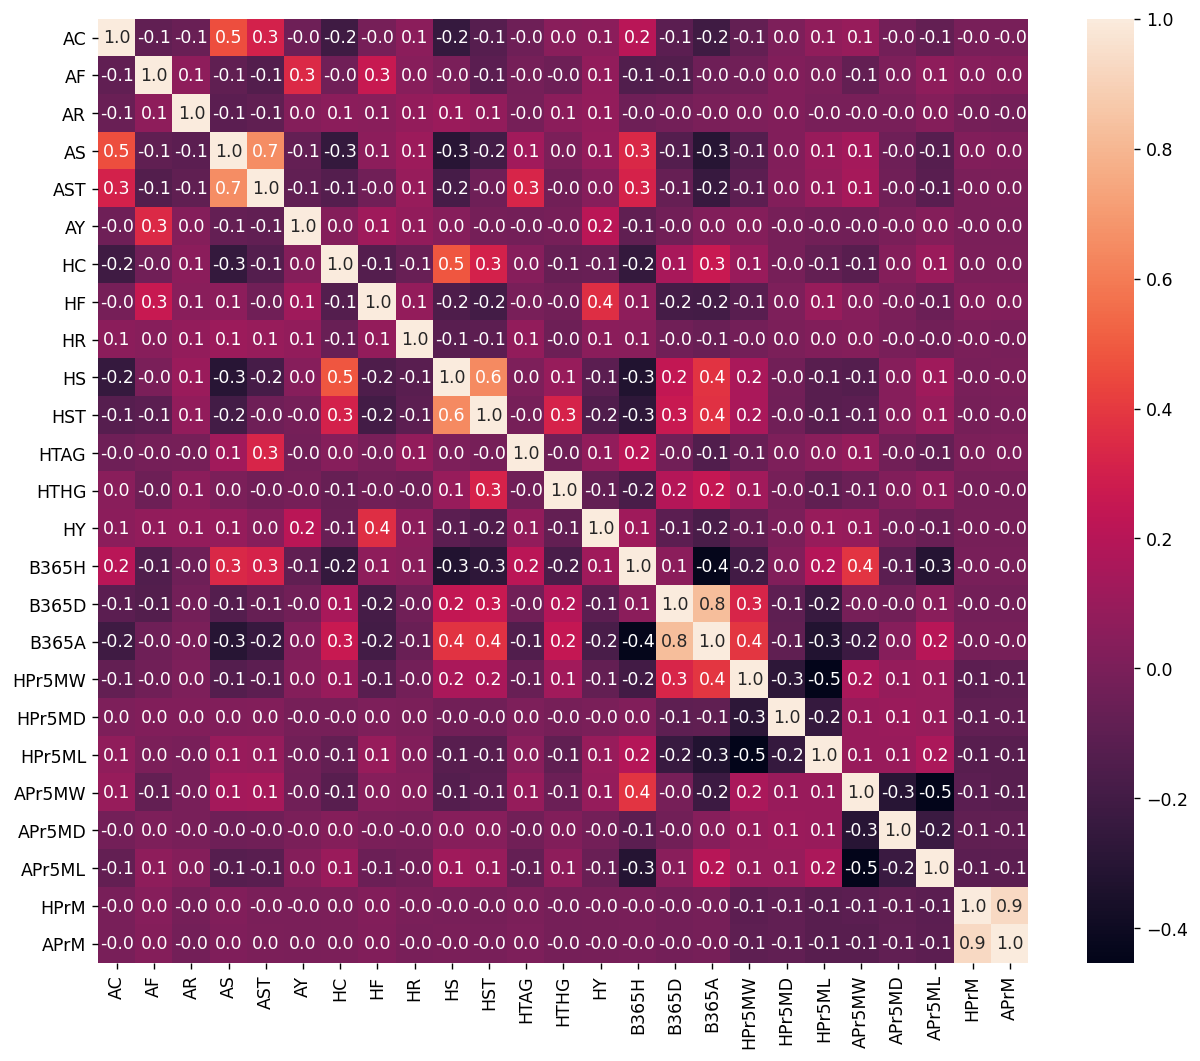

In [19]:
plt.figure(figsize=(12, 10), dpi=125) # on train_df
sns.heatmap(train_df.corr(), annot=True, fmt=".1f")

We know that HS, HST, HC generally increase together as the home team makes more attempts at scoring a goal. Similar observations can be made for the Away team as well. We can reduce the dimensionality of our data by dropping HS, HC, AS, AC and keeping HST, AST as predictors of our model.

This way we can also drop some of the higher correlation values seen in correlation matrix. 

In [20]:
train_df = train_df.drop(columns=['HS', 'HC', 'AS', 'AC'])
test_df = test_df.drop(columns=['HS', 'HC', 'AS', 'AC'])

Right now, the correlation between the columns B365A and B365D is really high at 0.8. Dropping both of them and just keeping the homeTeamWinOdds can be done. But something that captures what is going to happen is using the odds itself. Out of win/loss/draw, the one whose betting odds are the smallest is the most predictable result.

In [21]:
? helperFunctions.getBet365prediction

Signature:  helperFunctions.getBet365prediction(row)
Docstring: Return most predictable result according to Bet365.
File:      /code/football-ftr-prediction/helperFunctions.py
Type:      function


In [22]:
train_df["B365pred"] = train_df.progress_apply(helperFunctions.getBet365prediction, axis=1)
test_df["B365pred"] = test_df.progress_apply(helperFunctions.getBet365prediction, axis=1)

100%|██████████| 1826/1826 [00:00<00:00, 48961.48it/s]


Another pair of columns that are correlated are `HPrM` and `APrM`. Since both Home and Away Teams manage to get roughly the same number of days before thier next match, these columns are correlated. We can find the difference in the number of days the two teams got to rest. Zero values mean both team got same number of days and negative values mean that the awayTeam got a day or more of rest.

In [23]:
train_df["Ftg"] = train_df["HPrM"] - train_df["APrM"]
test_df["Ftg"] = test_df["HPrM"] - test_df["APrM"]

In [24]:
train_df # all columns are displayed 

,AF,AR,AST,AY,AwayTeam,Date,FTR,HF,HR,HST,HTAG,HTHG,HY,HomeTeam,league,B365H,B365D,B365A,HPr5MW,HPr5MD,HPr5ML,APr5MW,APr5MD,APr5ML,HPrM,APrM,B365pred,Ftg
0,12,0,4,0,Stuttgart,2009-08-07,H,12,0,7,0,0,0,Wolfsburg,bundesliga,1.95,3.50,3.75,0,0,0,0,0,0,18,18,H,0
1,10,0,0,1,FC Koln,2009-08-08,H,8,0,11,0,0,0,Dortmund,bundesliga,1.62,3.75,5.50,0,0,0,0,0,0,18,18,H,0
2,20,0,3,2,Hannover,2009-08-08,H,16,0,4,0,0,3,Hertha,bundesliga,1.80,3.50,4.50,0,0,0,0,0,0,18,18,H,0
3,28,0,3,2,Bayern Munich,2009-08-08,D,10,0,1,1,1,0,Hoffenheim,bundesliga,4.20,3.40,1.91,0,0,0,0,0,0,18,18,A,0
4,28,0,7,2,Leverkusen,2009-08-08,D,22,0,4,2,1,1,Mainz,bundesliga,3.80,3.40,2.00,0,0,0,0,0,0,18,18,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,1,0,4,1,Udinese,2017-05-28,H,15,0,6,0,3,2,Inter,serie-a,1.33,5.50,8.50,1,0,4,1,2,2,7,7,H,0
12778,16,0,4,4,Empoli,2017-05-28,H,18,0,5,0,0,3,Palermo,serie-a,6.00,4.33,1.53,2,1,2,2,0,3,6,7,A,-1
12779,14,0,4,0,Genoa,2017-05-28,H,8,0,7,1,1,2,Roma,serie-a,1.06,15.00,34.00,4,0,1,2,0,3,8,7,H,1
12780,8,0,7,0,Napoli,2017-05-28,A,9,0,2,2,0,1,Sampdoria,serie-a,15.00,7.50,1.18,0,3,2,4,1,0,7,8,A,-1


In [25]:
test_df # all columns are displayed 

,AF,AR,AST,AY,AwayTeam,Date,HF,HR,HST,HTAG,HTHG,HY,HomeTeam,league,B365H,B365D,B365A,HPr5MW,HPr5MD,HPr5ML,APr5MW,APr5MD,APr5ML,HPrM,APrM,B365pred,Ftg
0,17,0,4,2,Leverkusen,2017-08-18,13,0,8,0,2,1,Bayern Munich,bundesliga,1.25,6.00,12.00,0,0,0,0,0,0,18,18,H,0
1,16,0,1,3,Augsburg,2017-08-19,18,0,5,0,1,4,Hamburg,bundesliga,2.10,3.40,3.60,0,0,0,0,0,0,18,18,H,0
2,12,0,2,1,Stuttgart,2017-08-19,18,0,3,0,0,2,Hertha,bundesliga,2.00,3.40,3.90,0,0,0,0,0,0,18,18,H,0
3,15,0,2,3,Werder Bremen,2017-08-19,17,0,3,0,0,1,Hoffenheim,bundesliga,1.75,4.00,4.33,0,0,0,0,0,0,18,18,H,0
4,14,0,2,5,Hannover,2017-08-19,18,0,6,0,0,3,Mainz,bundesliga,2.00,3.40,4.00,0,0,0,0,0,0,18,18,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,5,1,3,1,Fiorentina,2018-05-20,10,0,11,1,2,2,Milan,serie-a,1.83,3.80,4.20,2,2,1,2,0,3,7,7,H,0
1822,9,0,4,0,Crotone,2018-05-20,3,0,9,0,2,0,Napoli,serie-a,1.50,4.75,5.75,3,1,1,2,2,1,7,7,H,0
1823,8,0,6,1,Roma,2018-05-20,14,0,3,1,0,1,Sassuolo,serie-a,4.00,3.80,1.85,4,0,1,4,1,0,8,7,A,1
1824,11,0,3,4,Sampdoria,2018-05-20,10,0,6,0,1,1,Spal,serie-a,1.61,4.00,5.50,2,1,2,2,0,3,7,7,H,0


In [26]:
# we can now drop some of the columns using which we made changes
train_df = train_df.drop(columns=['B365H', 'B365D', 'B365A', 'HPrM', 'APrM'])
test_df = test_df.drop(columns=['B365H', 'B365D', 'B365A','HPrM', 'APrM'])

<AxesSubplot:>

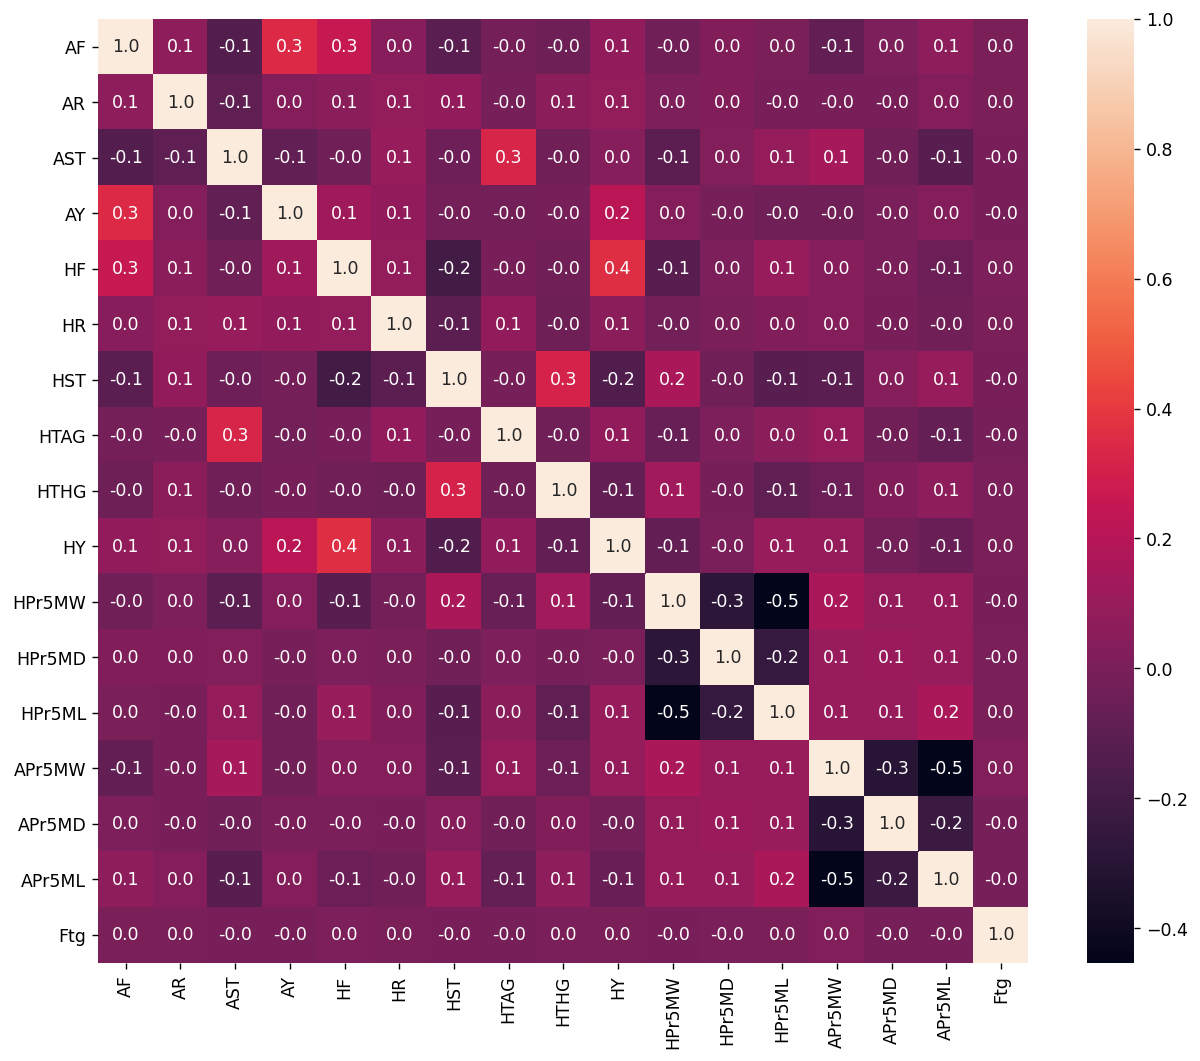

In [27]:
# plotting the correlation matrix again
plt.figure(figsize=(12, 10), dpi=125) # on train_df
sns.heatmap(train_df.corr(), annot=True, fmt=".1f")

Let's list the column we have and rerrange them

In [28]:
list(train_df.columns)

['AF',
 'AR',
 'AST',
 'AY',
 'AwayTeam',
 'Date',
 'FTR',
 'HF',
 'HR',
 'HST',
 'HTAG',
 'HTHG',
 'HY',
 'HomeTeam',
 'league',
 'HPr5MW',
 'HPr5MD',
 'HPr5ML',
 'APr5MW',
 'APr5MD',
 'APr5ML',
 'B365pred',
 'Ftg']

In [29]:
list(test_df.columns)

['AF',
 'AR',
 'AST',
 'AY',
 'AwayTeam',
 'Date',
 'HF',
 'HR',
 'HST',
 'HTAG',
 'HTHG',
 'HY',
 'HomeTeam',
 'league',
 'HPr5MW',
 'HPr5MD',
 'HPr5ML',
 'APr5MW',
 'APr5MD',
 'APr5ML',
 'B365pred',
 'Ftg']

In [30]:
# rearranging columns in train_df and test_df

train_df = train_df[[
    'Date', 'league', 'HomeTeam', 'AwayTeam',
    'HF', 'HR', 'HST', 'HY', 'HPr5MW', 'HPr5MD', 'HPr5ML', 'HTHG', 
    'AF', 'AR', 'AST', 'AY', 'APr5MW', 'APr5MD', 'APr5ML', 'HTAG',
    'Ftg', 'B365pred', 'FTR'
]]

test_df = test_df[[
    'Date', 'league', 'HomeTeam', 'AwayTeam',
    'HF', 'HR', 'HST', 'HY', 'HPr5MW', 'HPr5MD', 'HPr5ML', 'HTHG',
    'AF', 'AR', 'AST', 'AY', 'APr5MW', 'APr5MD', 'APr5ML', 'HTAG',
    'Ftg', 'B365pred'
]]

In [31]:
train_df

,Date,league,HomeTeam,AwayTeam,HF,HR,HST,HY,HPr5MW,HPr5MD,HPr5ML,HTHG,AF,AR,AST,AY,APr5MW,APr5MD,APr5ML,HTAG,Ftg,B365pred,FTR
0,2009-08-07,bundesliga,Wolfsburg,Stuttgart,12,0,7,0,0,0,0,0,12,0,4,0,0,0,0,0,0,H,H
1,2009-08-08,bundesliga,Dortmund,FC Koln,8,0,11,0,0,0,0,0,10,0,0,1,0,0,0,0,0,H,H
2,2009-08-08,bundesliga,Hertha,Hannover,16,0,4,3,0,0,0,0,20,0,3,2,0,0,0,0,0,H,H
3,2009-08-08,bundesliga,Hoffenheim,Bayern Munich,10,0,1,0,0,0,0,1,28,0,3,2,0,0,0,1,0,A,D
4,2009-08-08,bundesliga,Mainz,Leverkusen,22,0,4,1,0,0,0,1,28,0,7,2,0,0,0,2,0,A,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,2017-05-28,serie-a,Inter,Udinese,15,0,6,2,1,0,4,3,1,0,4,1,1,2,2,0,0,H,H
12778,2017-05-28,serie-a,Palermo,Empoli,18,0,5,3,2,1,2,0,16,0,4,4,2,0,3,0,-1,A,H
12779,2017-05-28,serie-a,Roma,Genoa,8,0,7,2,4,0,1,1,14,0,4,0,2,0,3,1,1,H,H
12780,2017-05-28,serie-a,Sampdoria,Napoli,9,0,2,1,0,3,2,0,8,0,7,0,4,1,0,2,-1,A,A


In [32]:
test_df

,Date,league,HomeTeam,AwayTeam,HF,HR,HST,HY,HPr5MW,HPr5MD,HPr5ML,HTHG,AF,AR,AST,AY,APr5MW,APr5MD,APr5ML,HTAG,Ftg,B365pred
0,2017-08-18,bundesliga,Bayern Munich,Leverkusen,13,0,8,1,0,0,0,2,17,0,4,2,0,0,0,0,0,H
1,2017-08-19,bundesliga,Hamburg,Augsburg,18,0,5,4,0,0,0,1,16,0,1,3,0,0,0,0,0,H
2,2017-08-19,bundesliga,Hertha,Stuttgart,18,0,3,2,0,0,0,0,12,0,2,1,0,0,0,0,0,H
3,2017-08-19,bundesliga,Hoffenheim,Werder Bremen,17,0,3,1,0,0,0,0,15,0,2,3,0,0,0,0,0,H
4,2017-08-19,bundesliga,Mainz,Hannover,18,0,6,3,0,0,0,0,14,0,2,5,0,0,0,0,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2018-05-20,serie-a,Milan,Fiorentina,10,0,11,2,2,2,1,2,5,1,3,1,2,0,3,1,0,H
1822,2018-05-20,serie-a,Napoli,Crotone,3,0,9,0,3,1,1,2,9,0,4,0,2,2,1,0,0,H
1823,2018-05-20,serie-a,Sassuolo,Roma,14,0,3,1,4,0,1,0,8,0,6,1,4,1,0,1,1,A
1824,2018-05-20,serie-a,Spal,Sampdoria,10,0,6,1,2,1,2,1,11,0,3,4,2,0,3,0,0,H


In [34]:
# save the train_df and test_df as CSV
if not os.path.exists('feature_engineered_data'):
    os.mkdir('feature_engineered_data')

train_df.to_csv(os.path.join("feature_engineered_data", 'train.csv'), index=False)
test_df.to_csv(os.path.join("feature_engineered_data", 'test-3.csv'), index=False)